/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

(None, 112, 112, 64)
(None, 56, 56, 64)
(None, 56, 56, 64)
(None, 56, 56, 64)
(None, 56, 56, 192)
(None, 56, 56, 192)
(None, 28, 28, 192)
(None, 28, 28, 256)
(None, 28, 28, 480)
(None, 14, 14, 480)
(None, 14, 14, 512)
(None, 14, 14, 512)
(None, 12800)
(None, 1024)
(None, 1000)
(None, 1000)
(None, 14, 14, 512)
(None, 14, 14, 512)
(None, 14, 14, 528)
(None, 14, 14, 528)
(None, 13200)
(None, 1024)
(None, 1000)
(None, 1000)
(None, 14, 14, 832)
(None, 7, 7, 832)
(None, 7, 7, 832)
(None, 7, 7, 1024)
(None, 1, 1, 1024)
(None, 1024)
(None, 1024)
(None, 1000)
(None, 1000)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                   

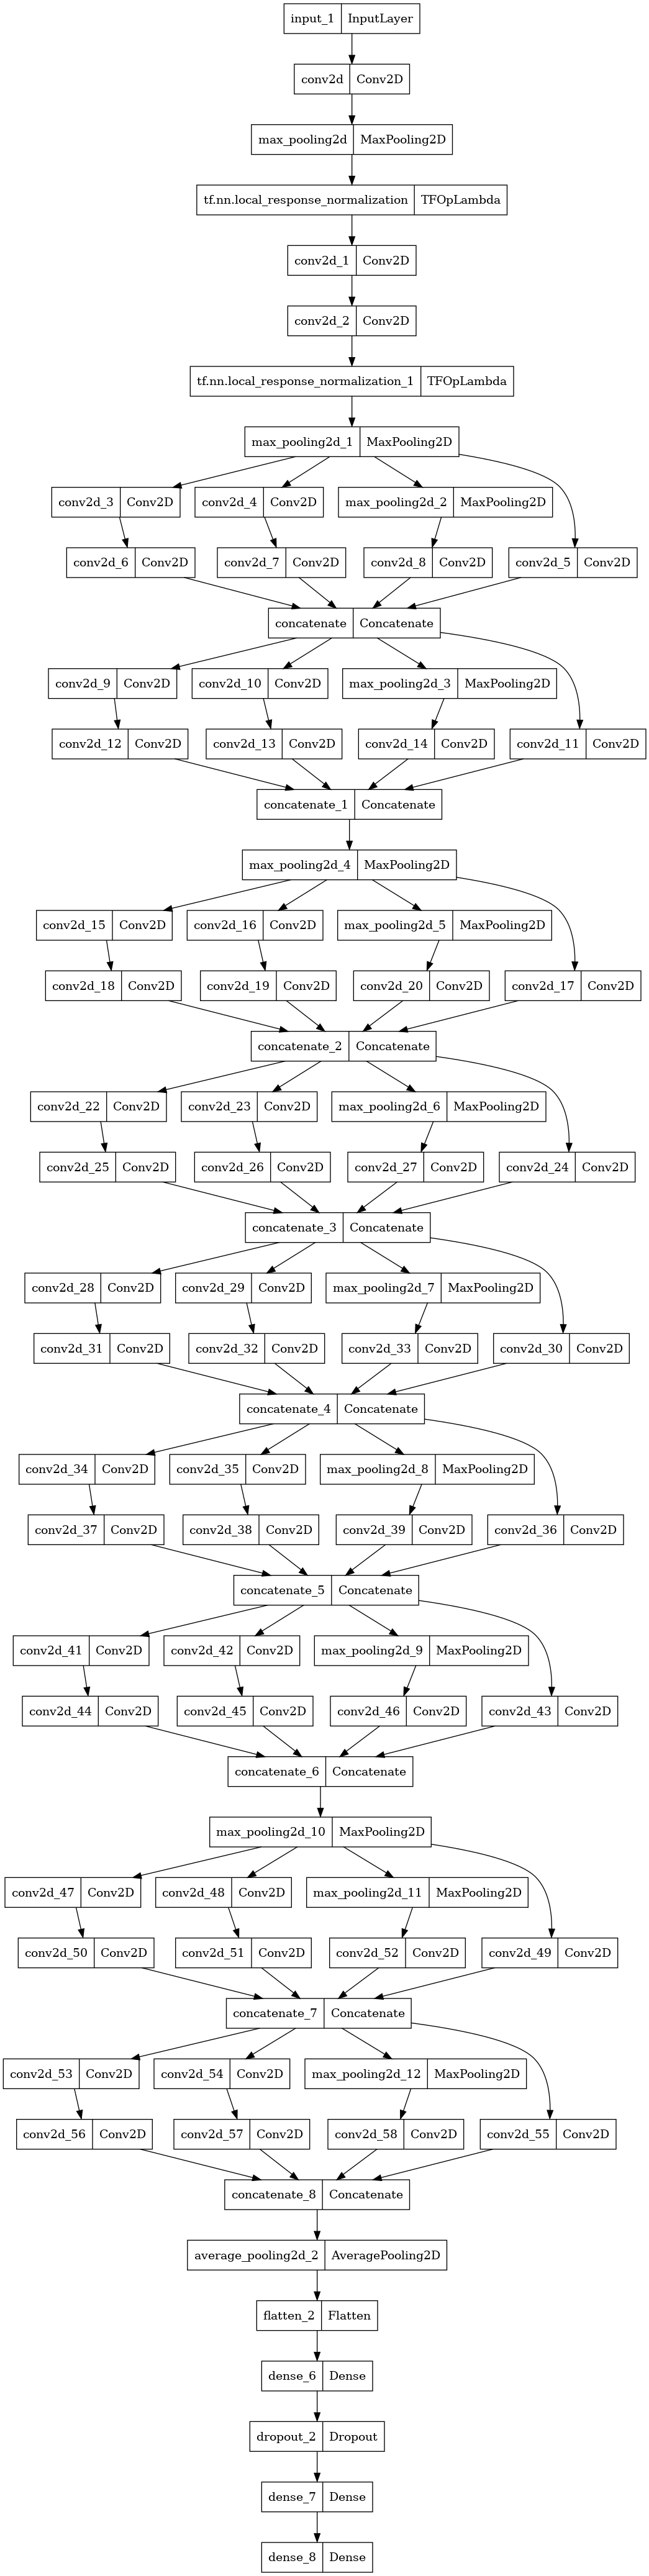

In [2]:
## GoogleLeNet Model

import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, AveragePooling2D, Flatten, Dense,Activation,Concatenate
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (224, 224, 3)

# Define the input tensor
inputs = Input(shape=input_shape)

x = Conv2D(64, (7, 7), strides = (2),padding = "same", activation='relu')(inputs)
print(x.shape)

x = MaxPooling2D(pool_size=(3, 3),padding = "same",strides = (2))(x)
print(x.shape)

x = tf.nn.local_response_normalization(x)
print(x.shape)

x = Conv2D(64, (1, 1),strides = (1), padding = "same", activation='relu')(x)
print(x.shape)

x = Conv2D(192, (3, 3), strides = (1), padding = "same", activation='relu')(x)
print(x.shape)

x = tf.nn.local_response_normalization(x)
print(x.shape)

x = MaxPooling2D(pool_size=(3, 3),padding = "same",strides = (2))(x)
print(x.shape)

# Inception Layer 3a

x1 = Conv2D(96, (1, 1), padding = 'same' , activation='relu')(x)

x2 = Conv2D(16, (1, 1), padding = 'same' ,activation='relu')(x)

x3 = MaxPooling2D(pool_size=(3, 3), strides = (1), padding = 'same')(x)

x4 = Conv2D(64, (1, 1), padding = 'same' , activation='relu')(x)

x5 = Conv2D(128, (3, 3), padding = 'same' ,activation='relu')(x1)

x6 = Conv2D(32, (5, 5), padding = 'same' ,activation='relu')(x2)

x7 = Conv2D(32, (1, 1), padding = 'same' ,activation='relu')(x3)


x = Concatenate()([x4, x5, x6, x7])
print(x.shape)

# Inception Layer 3b

x1 = Conv2D(32, (1, 1), padding = 'same' , activation='relu')(x)

x2 = Conv2D(32, (1, 1), padding = 'same' ,activation='relu')(x)

x3 = MaxPooling2D(pool_size=(3, 3), strides = (1), padding = 'same')(x)

x4 = Conv2D(64, (1, 1), padding = 'same' , activation='relu')(x)

x5 = Conv2D(256, (3, 3), padding = 'same' ,activation='relu')(x1)

x6 = Conv2D(32, (5, 5), padding = 'same' ,activation='relu')(x2)

x7 = Conv2D(128, (1, 1), padding = 'same' ,activation='relu')(x3)


x = Concatenate()([x4, x5, x6, x7])
print(x.shape)

x = MaxPooling2D(pool_size=(3, 3),padding = "same",strides = (2))(x)
print(x.shape)

# Inception Layer 4a

x1 = Conv2D(192, (1, 1), padding = 'same' , activation='relu')(x)

x2 = Conv2D(32, (1, 1), padding = 'same' ,activation='relu')(x)

x3 = MaxPooling2D(pool_size=(3, 3), strides = (1), padding = 'same')(x)

x4 = Conv2D(128, (1, 1), padding = 'same' , activation='relu')(x)

x5 = Conv2D(256, (3, 3), padding = 'same' ,activation='relu')(x1)

x6 = Conv2D(64, (5, 5), padding = 'same' ,activation='relu')(x2)

x7 = Conv2D(64, (1, 1), padding = 'same' ,activation='relu')(x3)


x = Concatenate()([x4, x5, x6, x7])
print(x.shape)

x_s = x

x_s = AveragePooling2D(pool_size=(5, 5), strides = (3), padding = 'same')(x_s)
print(x.shape)

x_s = Conv2D(512, (1, 1), padding = 'same' ,activation='relu')(x_s)

x_s = Flatten()(x_s)
print(x_s.shape)

x_s = Dense(1024, activation='relu')(x_s)
x_s = tf.keras.layers.Dropout(0.4)(x_s)
print(x_s.shape)

x_s = Dense(1000, activation='relu')(x_s)
print(x_s.shape)

output0 = Dense(4, activation='softmax')(x_s)
print(x_s.shape)


# Inception Layer 4b

x1 = Conv2D(192, (1, 1), padding = 'same' , activation='relu')(x)

x2 = Conv2D(32, (1, 1), padding = 'same' ,activation='relu')(x)

x3 = MaxPooling2D(pool_size=(3, 3), strides = (1), padding = 'same')(x)

x4 = Conv2D(128, (1, 1), padding = 'same' , activation='relu')(x)

x5 = Conv2D(256, (3, 3), padding = 'same' ,activation='relu')(x1)

x6 = Conv2D(64, (5, 5), padding = 'same' ,activation='relu')(x2)

x7 = Conv2D(64, (1, 1), padding = 'same' ,activation='relu')(x3)


x = Concatenate()([x4, x5, x6, x7])
print(x.shape)


# Inception Layer 4c

x1 = Conv2D(192, (1, 1), padding = 'same' , activation='relu')(x)

x2 = Conv2D(32, (1, 1), padding = 'same' ,activation='relu')(x)

x3 = MaxPooling2D(pool_size=(3, 3), strides = (1), padding = 'same')(x)

x4 = Conv2D(128, (1, 1), padding = 'same' , activation='relu')(x)

x5 = Conv2D(256, (3, 3), padding = 'same' ,activation='relu')(x1)

x6 = Conv2D(64, (5, 5), padding = 'same' ,activation='relu')(x2)

x7 = Conv2D(64, (1, 1), padding = 'same' ,activation='relu')(x3)


x = Concatenate()([x4, x5, x6, x7])
print(x.shape)

# Inception Layer 4d

x1 = Conv2D(192, (1, 1), padding = 'same' , activation='relu')(x)

x2 = Conv2D(32, (1, 1), padding = 'same' ,activation='relu')(x)

x3 = MaxPooling2D(pool_size=(3, 3), strides = (1), padding = 'same')(x)

x4 = Conv2D(128, (1, 1), padding = 'same' , activation='relu')(x)

x5 = Conv2D(256, (3, 3), padding = 'same' ,activation='relu')(x1)

x6 = Conv2D(80, (5, 5), padding = 'same' ,activation='relu')(x2)

x7 = Conv2D(64, (1, 1), padding = 'same' ,activation='relu')(x3)


x = Concatenate()([x4, x5, x6, x7])
print(x.shape)

x_s = x

x_s = AveragePooling2D(pool_size=(5, 5), strides = (3), padding = 'same')(x_s)
print(x.shape)

x_s = Conv2D(528, (1, 1), padding = 'same' ,activation='relu')(x_s)

x_s = Flatten()(x_s)
print(x_s.shape)

x_s = Dense(1024, activation='relu')(x_s)
x_s = tf.keras.layers.Dropout(0.4)(x_s)
print(x_s.shape)

x_s = Dense(1000, activation='relu')(x_s)
print(x_s.shape)

output1 = Dense(4, activation='softmax')(x_s)
print(x_s.shape)

# Inception Layer 4e

x1 = Conv2D(192, (1, 1), padding = 'same' , activation='relu')(x)

x2 = Conv2D(32, (1, 1), padding = 'same' ,activation='relu')(x)

x3 = MaxPooling2D(pool_size=(3, 3), strides = (1), padding = 'same')(x)

x4 = Conv2D(128, (1, 1), padding = 'same' , activation='relu')(x)

x5 = Conv2D(256, (3, 3), padding = 'same' ,activation='relu')(x1)

x6 = Conv2D(256, (5, 5), padding = 'same' ,activation='relu')(x2)

x7 = Conv2D(192, (1, 1), padding = 'same' ,activation='relu')(x3)


x = Concatenate()([x4, x5, x6, x7])
print(x.shape)

x = MaxPooling2D(pool_size=(3, 3),padding = "same",strides = (2))(x)
print(x.shape)


# Inception Layer 5a

x1 = Conv2D(192, (1, 1), padding = 'same' , activation='relu')(x)

x2 = Conv2D(32, (1, 1), padding = 'same' ,activation='relu')(x)

x3 = MaxPooling2D(pool_size=(3, 3), strides = (1), padding = 'same')(x)

x4 = Conv2D(128, (1, 1), padding = 'same' , activation='relu')(x)

x5 = Conv2D(256, (3, 3), padding = 'same' ,activation='relu')(x1)

x6 = Conv2D(256, (5, 5), padding = 'same' ,activation='relu')(x2)

x7 = Conv2D(192, (1, 1), padding = 'same' ,activation='relu')(x3)


x = Concatenate()([x4, x5, x6, x7])
print(x.shape)


# Inception Layer 5b

x1 = Conv2D(192, (1, 1), padding = 'same' , activation='relu')(x)

x2 = Conv2D(32, (1, 1), padding = 'same' ,activation='relu')(x)

x3 = MaxPooling2D(pool_size=(3, 3), strides = (1), padding = 'same')(x)

x4 = Conv2D(128, (1, 1), padding = 'same' , activation='relu')(x)

x5 = Conv2D(256, (3, 3), padding = 'same' ,activation='relu')(x1)

x6 = Conv2D(256, (5, 5), padding = 'same' ,activation='relu')(x2)

x7 = Conv2D(384, (1, 1), padding = 'same' ,activation='relu')(x3)


x = Concatenate()([x4, x5, x6, x7])
print(x.shape)

x = AveragePooling2D(pool_size=(7, 7))(x)
print(x.shape)

x = Flatten()(x)
print(x.shape)

x = Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
print(x.shape)

x = Dense(1000, activation='relu')(x)
print(x.shape)

output2 = Dense(4, activation='softmax')(x)
print(x.shape)


# Create the model
GoogleLeNet_model = Model(inputs=inputs, outputs=output2 )

# Compile the model
GoogleLeNet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
GoogleLeNet_model.summary()

tf.keras.utils.plot_model( GoogleLeNet_model )

In [3]:
# Training With Mri Alzheimer Dataset

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
image = cv2.imread('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1002.jpg')
image.shape

(128, 128, 3)

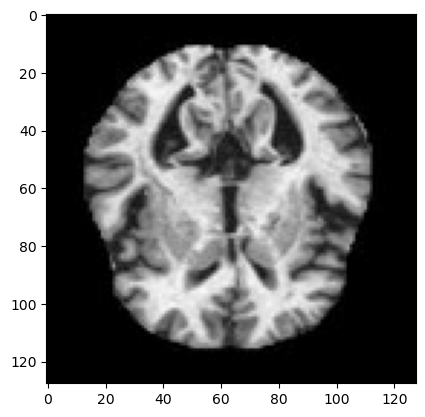

In [5]:
plt.imshow(image)

In [6]:
import glob
import librosa
import numpy as np
import cv2 

Mild_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Mild_Demented/*.jpg')
Moderate_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Moderate_Demented/*.jpg')
Non_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/*.jpg')
Very_Mild_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Very_Mild_Demented/*.jpg')


data = []
labels = []

image_size=(224,224)

for i in Mild_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)

for i in Moderate_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)
    
    data.append(image)
    labels.append(1)
    
for i in Non_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)
    
    data.append(image)
    labels.append(2)
    
for i in Very_Mild_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(3)
    
y=np.array(labels)

X=np.array(data)

print(X.shape)
print(y.shape)

(6400, 224, 224, 3)
(6400,)


In [7]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test .shape)
print(y_val .shape)

(4096, 224, 224, 3)
(1280, 224, 224, 3)
(1024, 224, 224, 3)
(4096,)
(1280,)
(1024,)


Epoch 1/10
128/128 [==============================] - 49s 145ms/step - loss: 1.0894 - accuracy: 0.4707 - val_loss: 1.0187 - val_accuracy: 0.5117
Epoch 2/10
128/128 [==============================] - 17s 136ms/step - loss: 1.0479 - accuracy: 0.4897 - val_loss: 1.0252 - val_accuracy: 0.5117
Epoch 3/10
128/128 [==============================] - 17s 136ms/step - loss: 1.0487 - accuracy: 0.4961 - val_loss: 1.0191 - val_accuracy: 0.5117
Epoch 4/10
128/128 [==============================] - 17s 136ms/step - loss: 1.0454 - accuracy: 0.4966 - val_loss: 1.0234 - val_accuracy: 0.5117
Epoch 5/10
128/128 [==============================] - 17s 137ms/step - loss: 1.0448 - accuracy: 0.4963 - val_loss: 1.0227 - val_accuracy: 0.5117
Epoch 6/10
128/128 [==============================] - 17s 136ms/step - loss: 1.0439 - accuracy: 0.4963 - val_loss: 1.0184 - val_accuracy: 0.5117
Epoch 7/10
128/128 [==============================] - 17s 136ms/step - loss: 1.0431 - accuracy: 0.4963 - val_loss: 1.0204 - val_ac

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


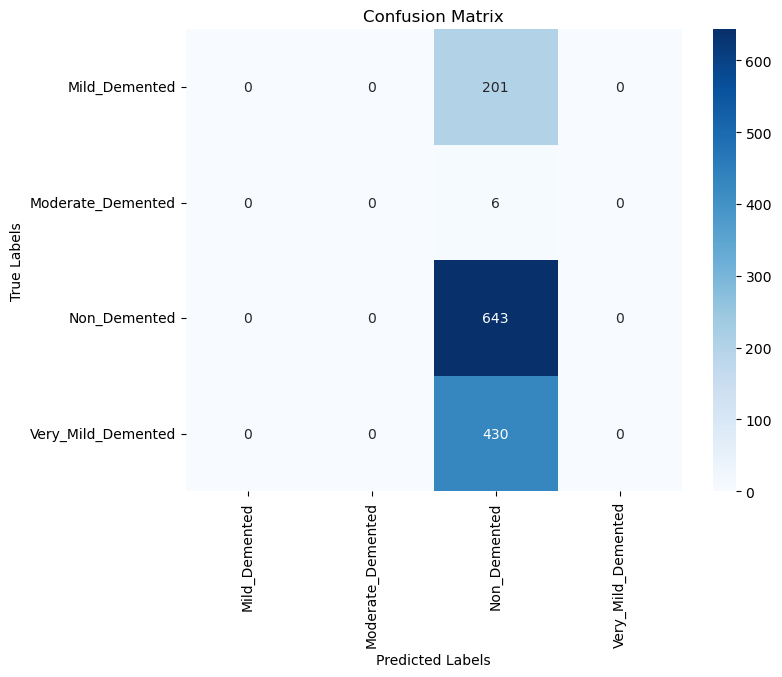

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


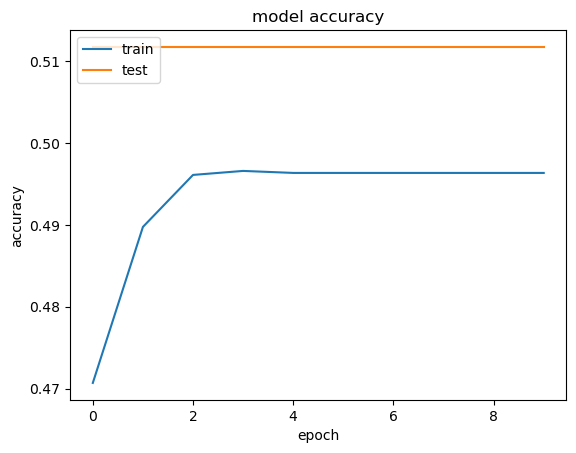

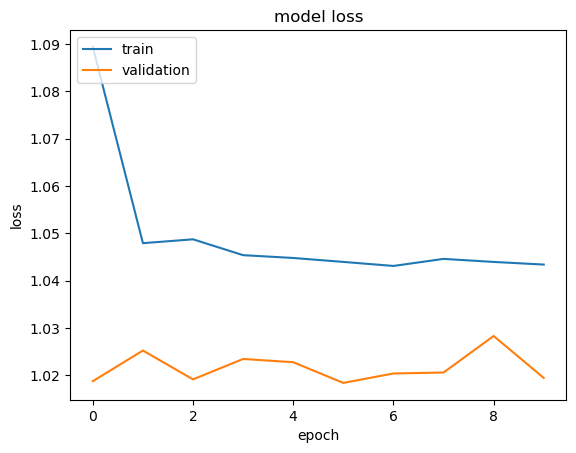

In [8]:
# Train with GoogleLeNet

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

history = GoogleLeNet_model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10, batch_size=32)
     
predictions = GoogleLeNet_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the classification report
class_names = list(['Mild_Demented','Moderate_Demented','Non_Demented','Very_Mild_Demented'])
report = classification_report(y_test, predicted_classes , target_names = class_names)
print("Classification Report:\n", report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()